In [1]:
import requests
import torch

from PIL import Image, ImageDraw
from transformers import pipeline
from transformers import YolosFeatureExtractor, YolosForObjectDetection

In [2]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [3]:
feature_extractor = YolosFeatureExtractor.from_pretrained('hustvl/yolos-tiny')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')

/Users/ericwu/opt/miniconda3/envs/yolos/lib/python3.9/site-packages/transformers/models/yolos/feature_extraction_yolos.py:28: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [4]:
inputs = feature_extractor(images=image, return_tensors="pt")

In [5]:
%time outputs = model(**inputs)

CPU times: user 610 ms, sys: 384 ms, total: 994 ms
Wall time: 232 ms


In [6]:
device = torch.device('mps')
model = model.to(device)
inputs = inputs.to(device)

In [7]:
# This model currently is not fully supported for mps
# %time outputs = model(**inputs)

In [8]:
device = torch.device('cpu')
model = model.to(device)
pipe = pipeline('object-detection', model=model, feature_extractor=feature_extractor)

In [11]:
annos = pipe(image)
annos

[{'score': 0.9939403533935547,
  'label': 'remote',
  'box': {'xmin': 46, 'ymin': 72, 'xmax': 181, 'ymax': 119}},
 {'score': 0.9747313261032104,
  'label': 'remote',
  'box': {'xmin': 340, 'ymin': 79, 'xmax': 372, 'ymax': 192}},
 {'score': 0.9836379289627075,
  'label': 'cat',
  'box': {'xmin': 12, 'ymin': 54, 'xmax': 319, 'ymax': 470}},
 {'score': 0.9223130941390991,
  'label': 'remote',
  'box': {'xmin': 41, 'ymin': 71, 'xmax': 178, 'ymax': 120}},
 {'score': 0.9137248396873474,
  'label': 'cat',
  'box': {'xmin': 342, 'ymin': 21, 'xmax': 638, 'ymax': 372}}]

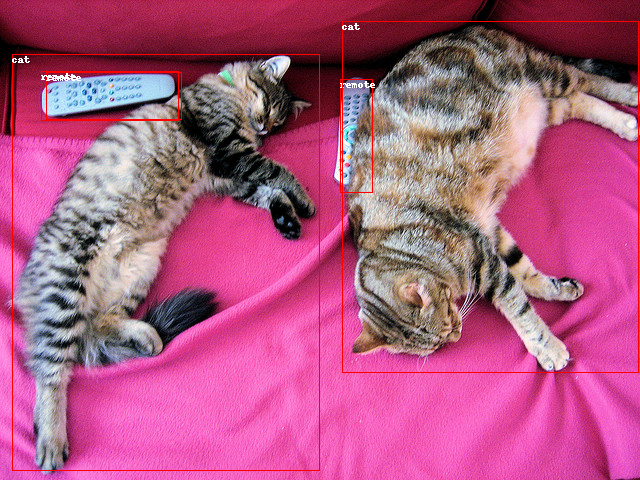

In [13]:
draw = ImageDraw.Draw(image, 'RGBA')

for anno in annos:
    box = anno['box']
    draw.rectangle((box['xmin'], box['ymin'], box['xmax'], box['ymax']),
                   outline='red', width=1)
    draw.text((box['xmin'], box['ymin']), anno['label'], fill='white')

image